**I completed this homework04 individually**

---

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine learning/Homework04

/content/drive/MyDrive/Colab Notebooks/Machine learning/Homework04


**Part I**

**Task 1: Prepare the Fashion MNIST dataset**

In [6]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid = train_test_split(X_train,test_size=5000, random_state=42) #validation set = test set = 5000
y_train, y_valid = train_test_split(y_train,test_size=5000, random_state=42) #validation set = test set = 5000

In [8]:
print("X_train.shape: ", X_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_valid.shape: ", y_valid.shape)
print("y_test.shape: ", y_test.shape)


X_train.shape:  (55000, 28, 28)
X_valid.shape:  (5000, 28, 28)
X_test.shape:  (10000, 28, 28)
y_train.shape:  (55000,)
y_valid.shape:  (5000,)
y_test.shape:  (10000,)


**Task 2: Visualize the sample images in the training data**

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

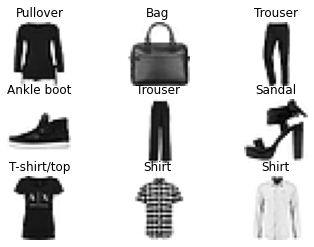

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(X_train[i], cmap=mpl.cm.binary)
  plt.title(class_names[y_train[i]])
  plt.axis("off")
plt.show()


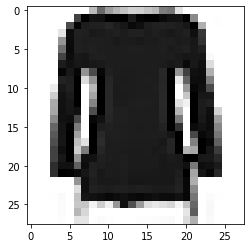

In [11]:
from matplotlib import pyplot as plt
a = plt.imshow(X_train[0], cmap=mpl.cm.binary)
plt.savefig("pullover.png")
plt.show()

Task 3: Examine the frequency of classes in train, validation, and test set

In [12]:
import pandas as pd

idx_a = pd.Index(y_train)
a = idx_a.value_counts()
y_train_freq = []
for i in range(len(a)):
  y_train_freq.append(a[i])

idx_b = pd.Index(y_test)
b = idx_b.value_counts()
y_test_freq = []
for i in range(len(b)):
  y_test_freq.append(b[i])

idx_c = pd.Index(y_valid)
c = idx_c.value_counts()
y_valid_freq = []
for i in range(len(c)):
  y_valid_freq.append(c[i])
print(y_train_freq)
print(y_test_freq)
print(y_valid_freq)

[5501, 5487, 5494, 5520, 5479, 5482, 5481, 5538, 5511, 5507]
[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]
[499, 513, 506, 480, 521, 518, 519, 462, 489, 493]


<BarContainer object of 10 artists>

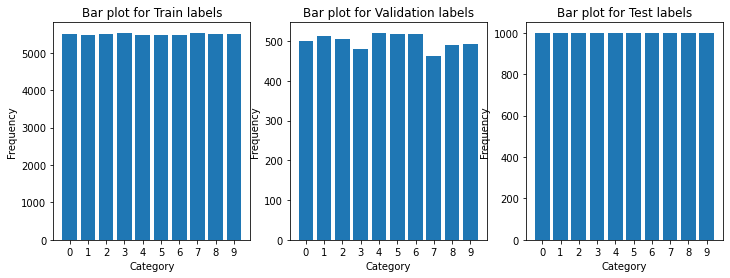

In [13]:
import matplotlib.pyplot as plt
x_axis = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize=(12,4))
plt.subplot(1,3,1) 
plt.title("Bar plot for Train labels")
plt.xticks(x_axis)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.bar(x_axis,y_train_freq)

plt.subplot(1,3,2) 
plt.title("Bar plot for Validation labels")
plt.xticks(x_axis)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.bar(x_axis,y_valid_freq)

plt.subplot(1,3,3) 
plt.title("Bar plot for Test labels")
plt.xticks(x_axis)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.bar(x_axis,y_test_freq)
# plt.subplot(1,3,2)
# plt.title("Bar plot for Validation labels")
# plt.subplot(1,3,3)
# plt.title("Bar plot for Test labels")



**Task 4.1: Build several classification models.**

**4.1.1.**

1. n_neighbors: number, define the cloest KNN.
2. metric: assign distance computation method to here (distance.euclidean, distance.minkowski, distance.cosine...). 
3. p: power parameter for the distance function,different power will get different result. default metric --> minkowski, default p --> 2, minkowski power of 2 --> euclidean_distance, minkowski power of 1 --> manhattan_distance
4. n_jobs: specify how many concurrent processes or threads should be uesd

**4.1.2.**

1. fit(X,y): fit the dataset to the classifier
2. predict(X): after fit, predict the label from the input data
3. predict_proba: return input data ptobability estimate
4. score(X,y): return the accuracy score

**4.1.3.**

**flatten each 2d mnist image into 1d array**

In [14]:
img_shape = X_train.shape
n_samples = img_shape[0]
width = img_shape[1]
height = img_shape[2]
X_train_flatten = X_train.reshape(n_samples,width*height)
print("X_train_flatten.shape: ",X_train_flatten.shape)

img_shape = X_test.shape
n_samples = img_shape[0]
width = img_shape[1]
height = img_shape[2]
X_test_flatten = X_test.reshape(n_samples,width*height)
print("X_test_flatten.shape: ",X_test_flatten.shape)

img_shape = X_valid.shape
n_samples = img_shape[0]
width = img_shape[1]
height = img_shape[2]
X_valid_flatten = X_valid.reshape(n_samples,width*height)
print("X_valid_flatten.shape: ",X_valid_flatten.shape)

X_train_flatten.shape:  (55000, 784)
X_test_flatten.shape:  (10000, 784)
X_valid_flatten.shape:  (5000, 784)


In [15]:
print(X_train_flatten[0])

[  0   0   0   0   0   0   0   0  68 149  99  76  59  44  47  60  71 129
 137  29   0   0   0   0   0   0   0   0   0   0   0   0   0   0 188 255
 236 238 255 255 255 228 250 255 255 245 238 236 255 118   0   0   1   0
   0   0   0   0   0   0   0 180 251 226 222 222 217 226 232 245 240 226
 222 221 223 226 232 253  80   0   1   0   0   0   0   0   0   0  27 242
 221 224 229 228 225 222 227 222 222 228 224 227 230 227 222 240 201   0
   0   0   0   0   0   0   0   0 106 244 222 226 225 225 226 229 227 228
 229 227 228 225 225 228 227 232 204   0   0   0   0   0   0   0   0   0
 143 245 223 225 223 226 226 226 226 225 225 226 226 224 228 226 222 230
 221   0   0   0   0   0   0   0   0   0 187 242 229 232 225 224 226 226
 226 226 226 226 226 226 226 229 233 230 232   5   0   0   0   0   0   0
   0   0 227 237 232 234 230 229 226 226 226 226 226 226 226 227 231 228
 245 230 239  34   0   0   0   0   0   0   0   0 249 231 249 107 180 248
 222 226 227 227 226 226 226 215 255 108 191 238 24

**KNN classifier**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn_model.fit(X_train_flatten, y_train)

KNeighborsClassifier(metric='euclidean')

In [17]:
import time
start = time.time()

#Run your codes here

y_valid_predicted_label = knn_model.predict(X_valid_flatten)

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 19.927552700042725 seconds:


**4.1.4. Practice how to save the trained model to disk. Write codes to re-load the model to answer the remaining questions.**

In [18]:
import pickle
filename = 'knn_test_model.sav'
pickle.dump(knn_model, open(filename, 'wb'))
knn_test_model = pickle.load(open(filename, 'rb'))
result = knn_test_model.predict([X_train_flatten[0]])

In [19]:
print(result)

[2]


**4.1.5.**

In [20]:
import pandas as pd
prediction_summary = pd.DataFrame({'predicted_label':y_valid_predicted_label, 'actual_label':y_valid})
prediction_summary

,predicted_label,actual_label
0,8,8
1,8,8
2,7,7
3,4,4
4,8,8
...,...,...
4995,2,2
4996,5,5
4997,9,9
4998,7,7


**4.1.6. Calculate the overall accuracy**

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.851

In [22]:
def My_accuracy(true,predict):
  count = 0
  for i in range(len(predict)):
    if predict[i] == true[i]:
      count+=1

  return count/len(predict)

My_accuracy(y_valid,y_valid_predicted_label)


0.851

**4.1.7. Calculate the per-class accuracy of the predictions.**

ref: 
1. https://www.quora.com/How-do-you-measure-the-accuracy-score-for-each-class-when-testing-classifier-in-sklearn
2. https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.diagonal.html

In [23]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_valid,y_valid_predicted_label)
cmat.diagonal()/cmat.sum(axis=1) 

array([0.86973948, 0.97465887, 0.80237154, 0.86458333, 0.7831094 ,
       0.83011583, 0.54720617, 0.96103896, 0.9406953 , 0.96146045])

In [24]:
def My_accuracy_perClass(true,predict):
  from sklearn.metrics import confusion_matrix
  cmat = confusion_matrix(y_valid,y_valid_predicted_label)
  per_accuracy = cmat.diagonal()/cmat.sum(axis=1) 
  class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
  for i in range(len(class_names)):
    print("Validation Accuracy of "+ class_names[i] + " is:",'%.5f' %per_accuracy[i]," ("+str('%.3f' % (per_accuracy[i]*100))+"%)")

My_accuracy_perClass(y_valid,y_valid_predicted_label)

Validation Accuracy of T-shirt/top is: 0.86974  (86.974%)
Validation Accuracy of Trouser is: 0.97466  (97.466%)
Validation Accuracy of Pullover is: 0.80237  (80.237%)
Validation Accuracy of Dress is: 0.86458  (86.458%)
Validation Accuracy of Coat is: 0.78311  (78.311%)
Validation Accuracy of Sandal is: 0.83012  (83.012%)
Validation Accuracy of Shirt is: 0.54721  (54.721%)
Validation Accuracy of Sneaker is: 0.96104  (96.104%)
Validation Accuracy of Bag is: 0.94070  (94.070%)
Validation Accuracy of Ankle boot is: 0.96146  (96.146%)


**4.1.8. visualize the classification confusion matrix**

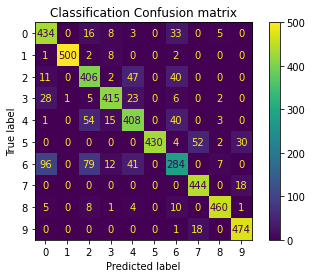

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

**4.1.9.**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model5 = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn_model5.fit(X_train_flatten, y_train)
y_valid_predicted_label = knn_model5.predict(X_valid_flatten)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.853

In [27]:
filename = 'KNeighborsClassifier_model.sav'
pickle.dump(knn_model5, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([X_train_flatten[0]])

In [28]:
print(result)

[2]


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn_model2 = KNeighborsClassifier(n_neighbors = 7, metric = "euclidean")
knn_model2.fit(X_train_flatten, y_train)
y_valid_predicted_label = knn_model2.predict(X_valid_flatten)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.8528

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn_model3 = KNeighborsClassifier(n_neighbors = 9, metric = "euclidean")
knn_model3.fit(X_train_flatten, y_train)
y_valid_predicted_label = knn_model3.predict(X_valid_flatten)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.8528

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model4 = KNeighborsClassifier(n_neighbors = 11, metric = "euclidean")
knn_model4.fit(X_train_flatten, y_train)
y_valid_predicted_label = knn_model4.predict(X_valid_flatten)
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.8498

knn=3 get the highest validation accuracy

In [32]:
y_test_predicted_label = knn_model5.predict(X_test_flatten) # prediction on testset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted_label)

0.8516

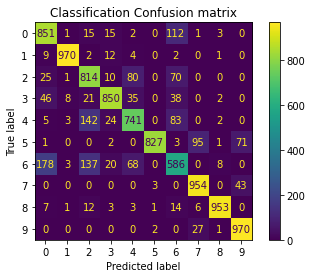

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

**4.1.10.**

**test set**

In [34]:
y_test_predicted_label = knn_model5.predict(X_test_flatten) # prediction on testset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted_label)


0.8516

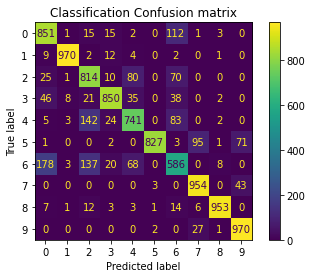

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

**validation set**

In [36]:
y_valid_predicted_label = knn_model5.predict(X_valid_flatten) # prediction on validset
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)


0.853

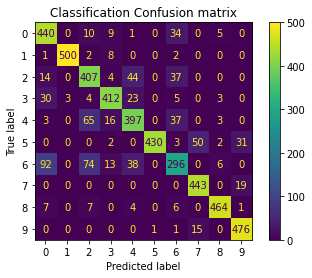

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, y_valid_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

**Task 4.2: Linear discriminant analysis**

**4.2.1.**

bayes classification is used as a classification algorithm to classify data into several dirrerent classes, and different class have different probabilities, base on this we can input our dataset and predict the label.

**4.2.2.**

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_flatten, y_train)

LinearDiscriminantAnalysis()

In [39]:
import time
start = time.time()

#Run your codes here

y_valid_predicted_label = LDA_model.predict(X_valid_flatten)

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 0.026658058166503906 seconds:


LinearDiscriminantAnalysis is much faster than KNN method.

**4.2.3.**

In [40]:
import pickle
filename = 'LinearDiscriminantAnalysis_model.sav'
pickle.dump(LDA_model, open(filename, 'wb'))
LDA_final_model = pickle.load(open(filename, 'rb'))
result = LDA_final_model.predict([X_train_flatten[0]])

In [41]:
print(result)

[2]


**4.2.4.**

**train**

In [42]:
y_train_predicted_label = LDA_final_model.predict(X_train_flatten) # prediction on trainset
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_predicted_label)

0.8331090909090909

**valid**

In [43]:
y_valid_predicted_label = LDA_final_model.predict(X_valid_flatten) # prediction on validset
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.821

**test**

In [44]:
y_test_predicted_label = LDA_final_model.predict(X_test_flatten) # prediction on testset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted_label)

0.8139

**4.2.5.**

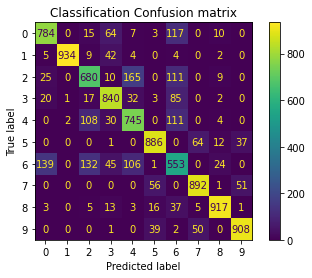

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_test_predicted_label)
per_accuracy = cmat.diagonal()/cmat.sum(axis=1) 
print(per_accuracy)

[0.784 0.934 0.68  0.84  0.745 0.886 0.553 0.892 0.917 0.908]


* class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
* T-shirt are index 0 in class_names, we can see 784 T-shirt are correctly predict, accuracy is 78.4% 

**Task 4.3: Quadratic discriminant analysis**

**4.3.1.**

In [47]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(X_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [48]:
import time
start = time.time()

#Run your codes here

y_valid_predicted_label = QDA_model.predict(X_valid_flatten)

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 2.3457891941070557 seconds:


QuadraticDiscriminantAnalysis is much faster than KNN method.

**4.3.2.**

In [49]:
import pickle
filename = 'QuadraticDiscriminantAnalysis_model.sav'
pickle.dump(QDA_model, open(filename, 'wb'))
QDA_final_model = pickle.load(open(filename, 'rb'))
result = QDA_final_model.predict([X_train_flatten[0]])

In [50]:
print(result)

[2]


**4.3.3.**

**train**

In [51]:
y_train_predicted_label = QDA_final_model.predict(X_train_flatten) # prediction on trainset
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_predicted_label)

0.6213636363636363

**valid**

In [52]:
y_valid_predicted_label = QDA_final_model.predict(X_valid_flatten) # prediction on validset
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.573

**test**

In [53]:
y_test_predicted_label = QDA_final_model.predict(X_test_flatten) # prediction on testset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted_label)

0.5774

**4.3.4.**

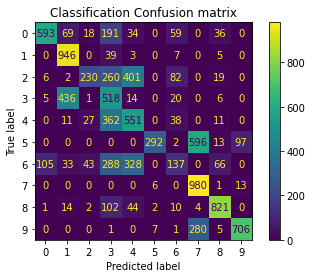

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_test_predicted_label)
per_accuracy = cmat.diagonal()/cmat.sum(axis=1) 
print(per_accuracy)

[0.593 0.946 0.23  0.518 0.551 0.292 0.137 0.98  0.821 0.706]


* class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
* T-shirt are index 0 in class_names, we can see 593 T-shirt are correctly predict, accuracy is 59.3% 

**Task 4.4: Gaussian Naive Bayes Classifier**

**4.4.1.**

In [56]:
from sklearn.naive_bayes import GaussianNB
GaussianNB_model = GaussianNB()
GaussianNB_model.fit(X_train_flatten, y_train)

GaussianNB()

In [57]:
import time
start = time.time()

#Run your codes here

y_valid_predicted_label = GaussianNB_model.predict(X_valid_flatten)

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 0.31482863426208496 seconds:


GaussianNB is much faster than KNN method.

**4.4.2.**

In [58]:
import pickle
filename = 'GaussianNB_model.sav'
pickle.dump(GaussianNB_model, open(filename, 'wb'))
GaussianNB_final_model = pickle.load(open(filename, 'rb'))
result = GaussianNB_final_model.predict([X_train_flatten[0]])

In [66]:
print(result)

[2]


**4.4.3.**

**train**

In [59]:
y_train_predicted_label = GaussianNB_final_model.predict(X_train_flatten) # prediction on trainset
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_predicted_label)

0.5890363636363637

**valid**

In [60]:
y_valid_predicted_label = GaussianNB_final_model.predict(X_valid_flatten) # prediction on validset
from sklearn.metrics import accuracy_score
accuracy_score(y_valid,y_valid_predicted_label)

0.588

**test**

In [61]:
y_test_predicted_label = GaussianNB_final_model.predict(X_test_flatten) # prediction on testset
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predicted_label)

0.5875

**4.4.4.**

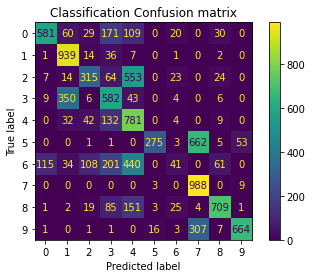

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predicted_label)
plt.title("Classification Confusion matrix")
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,y_test_predicted_label)
per_accuracy = cmat.diagonal()/cmat.sum(axis=1) 
print(per_accuracy)

[0.581 0.939 0.315 0.582 0.781 0.275 0.041 0.988 0.709 0.664]


* class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
* T-shirt are index 0 in class_names, we can see 581 T-shirt are correctly predict, accuracy is 58.1% 

**Part 2**

In [64]:
!pip install --quiet gradio

In [65]:
import gradio as gr
import pickle

input_module1 = gr.inputs.Image(label = "Input Image",image_mode='L', shape = (28,28)) #image_mode = "L" --> black and white pic,
input_module2 = gr.inputs.Dropdown(choices=["KNN", "LinearDiscriminantAnalysis", "QuadraticDiscriminantAnalysis", "GaussianNB"], label = "Methods")

output_module1 = gr.outputs.Textbox(label = "Predicted Class")
output_module2 = outputs=gr.Label(num_top_classes=10)

def Classification(input1,input2):

  class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

  image = input1.reshape(1, 28*28)
  with open('KNeighborsClassifier_model.sav', 'rb') as f:
    knn_model = pickle.load(f)
    
  with open('LinearDiscriminantAnalysis_model.sav', 'rb') as f:
    LDA_model = pickle.load(f)
    
  with open('QuadraticDiscriminantAnalysis_model.sav', 'rb') as f:
    QDA_model = pickle.load(f)
  
  with open('GaussianNB_model.sav', 'rb') as f:
    GaussianNB_model = pickle.load(f)

  if input2 == "KNN":
    predict = knn_model.predict(image)
    output1 = predict[0]
    
  elif input2 == "LinearDiscriminantAnalysis":
    predict = LDA_model.predict(image)
    output1 = predict[0]

  elif input2 == "QuadraticDiscriminantAnalysis":
    predict = QDA_model.predict(image)
    output1 = predict[0]

  elif input2 == "GaussianNB":
    predict = GaussianNB_model.predict(image)
    output1 = predict[0]

  confidences = {class_names[i]: 1 if i == output1 else 0 for i in range(len(class_names))}
  
  return class_names[output1],confidences 

gr.Interface(fn=Classification, 
             inputs = [input_module1, input_module2],
             outputs = [output_module1, output_module2],
             examples=[["bag.png","KNN"],["pullover.png","KNN"]], # we have 2 input so the example is nest list
             title = 'Homework04: Build ML workflow for image',
             description="Image classification.",
             ).launch()

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:217: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://13933.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f3a83a10150>,
 'http://127.0.0.1:7861/',
 'https://13933.gradio.app')

ref: https://gradio.app/image_classification_in_tensorflow/

* if else for loop in one line: a = [result if cond else result2 for x in y ] 
* only if: a = [result for x in y if cond] #cond=結果 result返回值
* pickle ref: https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/